<a href="https://colab.research.google.com/github/ibitabadger/Models1/blob/main/01_generate_data_and_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lightgbm==3.2.1

In [ ]:
import pandas as pd
import gdown
# Se define un diccionario con los tipos de datos específicos para cada columna de un dataframe de pandas.
train_dtypes = {
    'molecule_name': 'category',
    'atom_index_0': 'int8',
    'atom_index_1': 'int8',
    'type': 'category',
    'scalar_coupling_constant': 'float32'
}
# Se define un diccionario de números atómicos para elementos químicos
ATOMIC_NUMBERS = {
    'H': 1,  #Hidrógeno
    'C': 6,  #Carbono
    'N': 7,  #Nitrógeno
    'O': 8,  #Oxígeno
    'F': 9   #Fluor
}
#Mostrar cadenas de texto largas sin truncarlas
pd.set_option('display.max_colwidth', -1)
#mostrar hasta 120 filas antes de truncar la salida
pd.set_option('display.max_rows', 120)
#mostrar hasta 120 columnas antes de truncar la salida
pd.set_option('display.max_columns', 120)
#Dataframe magnetic shielding tensors
driveUrlMagnetic = 'https://drive.google.com/uc?id=1sP_bFjh0UuC1hMtAvDzAXetzwp698yJs'
outputFileMagnetic = 'magnetic_shielding_tensors.csv'
gdown.download(driveUrlMagnetic, outputFileMagnetic, quiet=False)
df_train_sub_tensor = pd.read_csv(outputFileMagnetic, delimiter = ';')
print(df_train_sub_tensor.head())

<ipython-input-7-f88fdd876ab1>:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
Downloading...
From (original): https://drive.google.com/uc?id=1sP_bFjh0UuC1hMtAvDzAXetzwp698yJs
From (redirected): https://drive.google.com/uc?id=1sP_bFjh0UuC1hMtAvDzAXetzwp698yJs&confirm=t&uuid=974e024c-b6f8-4fd4-8b0e-9e60a6e6d56f
To: /content/magnetic_shielding_tensors.csv
100%|██████████| 213M/213M [00:01<00:00, 159MB/s]


                                        molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0  dsgdb9nsd_000001,0,195.3147,0.0,-0.0001,0.0,195.3171,0.0007,-0.0001,0.0007,195.3169     
1  dsgdb9nsd_000001,1,31.341,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861 
2  dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3  dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.695,1.2724,1.6951,28.9579     
4  dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.626,28.9013 


In [ ]:
#Dataframe mulliken charges
driveUrlMulliken = 'https://drive.google.com/uc?id=1ERHKxkbCSTSxFXRXVB5uzd8TgHGkSjjq'
outputFileMulliken = 'mulliken_charges.csv'
gdown.download(driveUrlMulliken, outputFileMulliken, quiet=False)
df_train_sub_charge = pd.read_csv(outputFileMulliken, delimiter = ';')
print(df_train_sub_charge.head())

Downloading...
From: https://drive.google.com/uc?id=1ERHKxkbCSTSxFXRXVB5uzd8TgHGkSjjq
To: /content/mulliken_charges.csv
100%|██████████| 75.1M/75.1M [00:00<00:00, 153MB/s]


  molecule_name,atom_index,mulliken_charge
0  dsgdb9nsd_000001,0,-0.5356890000000001 
1  dsgdb9nsd_000001,1,0.133921            
2  dsgdb9nsd_000001,2,0.133922            
3  dsgdb9nsd_000001,3,0.13392300000000001 
4  dsgdb9nsd_000001,4,0.13392300000000001 


In [ ]:
#Dataframe structures
structures_dtypes = {
    'molecule_name': 'category',
    'atom_index': 'int8',
    'atom': 'category',
    'x': 'float32',
    'y': 'float32',
    'z': 'float32'
}
driveUrlStructures = 'https://drive.google.com/uc?id=10un5w-BDlBxgi2WIgmLDGINwSfoPU1t2'
outputFileStructures = 'structures.csv'
gdown.download(driveUrlStructures, outputFileStructures, quiet=False)
structures_csv = pd.read_csv(outputFileStructures, dtype=structures_dtypes)
structures_csv['molecule_index'] = structures_csv.molecule_name.str.replace('dsgdb9nsd_', '').astype('int32')
structures_csv = structures_csv[['molecule_index', 'atom_index', 'atom', 'x', 'y', 'z']]
structures_csv['atom'] = structures_csv['atom'].replace(ATOMIC_NUMBERS).astype('int8')
structures_csv.head(10)


Downloading...
From (original): https://drive.google.com/uc?id=10un5w-BDlBxgi2WIgmLDGINwSfoPU1t2
From (redirected): https://drive.google.com/uc?id=10un5w-BDlBxgi2WIgmLDGINwSfoPU1t2&confirm=t&uuid=f44f4209-08b1-4aca-98ff-1f305633bb89
To: /content/structures.csv
100%|██████████| 157M/157M [00:03<00:00, 48.3MB/s]
<ipython-input-9-3976c160c1c9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  structures_csv['atom'] = structures_csv['atom'].replace(ATOMIC_NUMBERS).astype('int8')


,molecule_index,atom_index,atom,x,y,z
0,1,0,6,-0.012698,1.085804,0.008001
1,1,1,1,0.002150,-0.006031,0.001976
2,1,2,1,1.011731,1.463751,0.000277
3,1,3,1,-0.540815,1.447527,-0.876644
4,1,4,1,-0.523814,1.437933,0.906397
5,2,0,7,-0.040426,1.024108,0.062564
6,2,1,1,0.017257,0.012545,-0.027377
7,2,2,1,0.915789,1.358745,-0.028758
8,2,3,1,-0.520278,1.343532,-0.775543
9,3,0,8,-0.034360,0.977540,0.007602


In [ ]:
# Imprimir la forma del DataFrame `structures_csv`, mostrando el número de filas y columnas.
print('Shape: ', structures_csv.shape)

# Calcular y mostrar la cantidad total de memoria (en bytes) que el DataFrame `structures_csv` está utilizando.
print('Total: ', structures_csv.memory_usage().sum())

# Ejecutar `memory_usage()` en `structures_csv` para mostrar el uso de memoria de cada columna individualmente.
structures_csv.memory_usage()

Shape:  (2358875, 6)
Total:  42459878


Index             128    
molecule_index    9435500
atom_index        2358875
atom              2358875
x                 9435500
y                 9435500
z                 9435500
dtype: int64

In [ ]:
#Dataframe test. Conjunto de prueba
driveUrlTest = 'https://drive.google.com/uc?id=1U7X0SLBAEFbNaDa2CHtOBHkYA9iTzGmm'
outputFileTest = 'test.csv'
gdown.download(driveUrlTest, outputFileTest, quiet=False)
test_csv = pd.read_csv(outputFileTest, index_col='id', dtype=train_dtypes)

#Añadir columna 'molecule_index'. Identificador numérico para cada molécula
test_csv['molecule_index'] = test_csv['molecule_name'].str.replace('dsgdb9nsd_', '').astype('int32')

#Selección del subconjunto de columnas para conservar en el DataFrame `test_csv`.
test_csv = test_csv[['molecule_index', 'atom_index_0', 'atom_index_1', 'type']]
test_csv.head(10)

Downloading...
From: https://drive.google.com/uc?id=1U7X0SLBAEFbNaDa2CHtOBHkYA9iTzGmm
To: /content/test.csv
100%|██████████| 87.9M/87.9M [00:00<00:00, 149MB/s]


,molecule_index,atom_index_0,atom_index_1,type
id,,,,
4659076,4,2,0,2JHC
4659077,4,2,1,1JHC
4659078,4,2,3,3JHH
4659079,4,3,0,1JHC
4659080,4,3,1,2JHC
4659081,14,3,0,1JHC
4659082,14,3,1,2JHC
4659083,14,3,4,2JHH
4659084,14,3,5,2JHH


In [ ]:
#Dataframe sample.

driveUrlSample = 'https://drive.google.com/uc?id=1lMSEThXn_JmEerxPZQLHCDwotj3zpe4A'
outputFileSample = 'test.csv'
gdown.download(driveUrlSample, outputFileSample, quiet=False)
submission_csv = pd.read_csv(outputFileSample, index_col='id')
print(submission_csv.head())

Downloading...
From: https://drive.google.com/uc?id=1lMSEThXn_JmEerxPZQLHCDwotj3zpe4A
To: /content/test.csv
100%|██████████| 25.1M/25.1M [00:00<00:00, 144MB/s] 


         scalar_coupling_constant
id                               
4659076  0                       
4659077  0                       
4659078  0                       
4659079  0                       
4659080  0                       


In [ ]:
#Dataframe train

driveUrlTrain = 'https://drive.google.com/uc?id=1cFjgpNoWLIFtvfBKqsxeZ_vWNeuelhwh'
outputFileTrain = 'train.csv'
gdown.download(driveUrlTrain, outputFileTrain, quiet=False)
train_csv = pd.read_csv(outputFileTrain, index_col='id', dtype=train_dtypes)
train_csv['molecule_index'] = train_csv.molecule_name.str.replace('dsgdb9nsd_', '').astype('int32')
train_csv = train_csv[['molecule_index', 'atom_index_0', 'atom_index_1', 'type', 'scalar_coupling_constant']]
train_csv.head(10)

Downloading...
From (original): https://drive.google.com/uc?id=1cFjgpNoWLIFtvfBKqsxeZ_vWNeuelhwh
From (redirected): https://drive.google.com/uc?id=1cFjgpNoWLIFtvfBKqsxeZ_vWNeuelhwh&confirm=t&uuid=866584bb-8f67-41a5-a6ab-4b9a09fac386
To: /content/train.csv
100%|██████████| 211M/211M [00:01<00:00, 150MB/s]


,molecule_index,atom_index_0,atom_index_1,type,scalar_coupling_constant
id,,,,,
0,1,1,0,1JHC,84.807602
1,1,1,2,2JHH,-11.257000
2,1,1,3,2JHH,-11.254800
3,1,1,4,2JHH,-11.254300
4,1,2,0,1JHC,84.807404
5,1,2,3,2JHH,-11.254100
6,1,2,4,2JHH,-11.254800
7,1,3,0,1JHC,84.809303
8,1,3,4,2JHH,-11.254300


In [ ]:
print('Shape: ', train_csv.shape)
print('Total: ', train_csv.memory_usage().sum())
train_csv.memory_usage()

Shape:  (4659076, 5)
Total:  88522808


Index                       37272608
molecule_index              18636304
atom_index_0                4659076 
atom_index_1                4659076 
type                        4659440 
scalar_coupling_constant    18636304
dtype: int64

In [ ]:
%matplotlib inline

import numpy as np

import math
import gc
import copy

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor

In [ ]:
#Función para filtrar por tipo de acopamiento dado

def build_type_dataframes(base, structures, coupling_type):
    base = base[base['type'] == coupling_type].drop('type', axis=1).copy()
    base = base.reset_index()
    base['id'] = base['id'].astype('int32')
    structures = structures[structures['molecule_index'].isin(base['molecule_index'])]
    return base, structures

In [ ]:
#Función para tomar un conjunto base de datos (base), combinarlo con un conjunto de estructuras moleculares (structures) para añadir las coordenadas (x, y, z) de los átomos específicos
def add_coordinates(base, structures, index):
    df = pd.merge(base, structures, how='inner',
                  left_on=['molecule_index', f'atom_index_{index}'],
                  right_on=['molecule_index', 'atom_index']).drop(['atom_index'], axis=1)
    df = df.rename(columns={
        'atom': f'atom_{index}',
        'x': f'x_{index}',
        'y': f'y_{index}',
        'z': f'z_{index}'
    })
    return df

In [ ]:
#Función para fusionar los DataFrames base y atoms en función de las columnas 'molecule_index', 'atom_index_0', y 'atom_index_1'
def add_atoms(base, atoms):
    df = pd.merge(base, atoms, how='inner',
                  on=['molecule_index', 'atom_index_0', 'atom_index_1'])
    return df

In [ ]:
#Función para combinar los DataFrames base y structures  y luego filtrar las filas donde los índices de átomos coinciden
def merge_all_atoms(base, structures):
    df = pd.merge(base, structures, how='left',
                  left_on=['molecule_index'],
                  right_on=['molecule_index'])
    df = df[(df.atom_index_0 != df.atom_index) & (df.atom_index_1 != df.atom_index)]
    return df

In [ ]:
#Función para calcular el centro entre dos puntos de coordenadas espaciales de átomos
def add_center(df):
    df['x_c'] = ((df['x_1'] + df['x_0']) * np.float32(0.5))
    df['y_c'] = ((df['y_1'] + df['y_0']) * np.float32(0.5))
    df['z_c'] = ((df['z_1'] + df['z_0']) * np.float32(0.5))

#Función para calcular la distancia euclidiana entre cada punto representado por las coordenadas (x, y, z)

def add_distance_to_center(df):
    df['d_c'] = ((
        (df['x_c'] - df['x'])**np.float32(2) +
        (df['y_c'] - df['y'])**np.float32(2) +
        (df['z_c'] - df['z'])**np.float32(2)
    )**np.float32(0.5))

#Función para calcular la distancia euclidiana entre dos puntos especificados por los sufijos de columnas dados (suffix1 y suffix2)
def add_distance_between(df, suffix1, suffix2):
    df[f'd_{suffix1}_{suffix2}'] = ((
        (df[f'x_{suffix1}'] - df[f'x_{suffix2}'])**np.float32(2) +
        (df[f'y_{suffix1}'] - df[f'y_{suffix2}'])**np.float32(2) +
        (df[f'z_{suffix1}'] - df[f'z_{suffix2}'])**np.float32(2)
    )**np.float32(0.5))

In [ ]:
#Función para calcular todas las distancias entre pares de átomos en el DataFrame
def add_distances(df):
    n_atoms = 1 + max([int(c.split('_')[1]) for c in df.columns if c.startswith('x_')])

    for i in range(1, n_atoms):
        for vi in range(min(4, i)):
            add_distance_between(df, i, vi)

In [ ]:
#Función para agregar información sobre el número de átomos de cada molécula al DataFrame base
def add_n_atoms(base, structures):
    dfs = structures['molecule_index'].value_counts().rename('n_atoms').to_frame()
    return pd.merge(base, dfs, left_on='molecule_index', right_index=True)

In [ ]:
#Función para construir un dataframe con características específicas de tipo de acoplamiento químico
def build_couple_dataframe(some_csv, structures_csv, coupling_type, n_atoms=10):
    base, structures = build_type_dataframes(some_csv, structures_csv, coupling_type)
    base = add_coordinates(base, structures, 0)
    base = add_coordinates(base, structures, 1)

    base = base.drop(['atom_0', 'atom_1'], axis=1)
    atoms = base.drop('id', axis=1).copy()
    if 'scalar_coupling_constant' in some_csv:
        atoms = atoms.drop(['scalar_coupling_constant'], axis=1)

    add_center(atoms)
    atoms = atoms.drop(['x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1'], axis=1)

    atoms = merge_all_atoms(atoms, structures)
    add_distance_to_center(atoms)

    atoms = atoms.drop(['x_c', 'y_c', 'z_c', 'atom_index'], axis=1)
    atoms.sort_values(['molecule_index', 'atom_index_0', 'atom_index_1', 'd_c'], inplace=True)
    atom_groups = atoms.groupby(['molecule_index', 'atom_index_0', 'atom_index_1'])
    atoms['num'] = atom_groups.cumcount() + 2
    atoms = atoms.drop(['d_c'], axis=1)
    atoms = atoms[atoms['num'] < n_atoms]

    atoms = atoms.set_index(['molecule_index', 'atom_index_0', 'atom_index_1', 'num']).unstack()
    atoms.columns = [f'{col[0]}_{col[1]}' for col in atoms.columns]
    atoms = atoms.reset_index()

    # downcast back to int8
    for col in atoms.columns:
        if col.startswith('atom_'):
            atoms[col] = atoms[col].fillna(0).astype('int8')

    atoms['molecule_index'] = atoms['molecule_index'].astype('int32')
    full = add_atoms(base, atoms)
    add_distances(full)

    full.sort_values('id', inplace=True)

    return full

In [ ]:
#Función para tomar un DataFrame df y un número máximo de átomos n_atoms para construir un nuevo DataFrame con las características seleccionadas.
def take_n_atoms(df, n_atoms, four_start=4):
    labels = []
    for i in range(2, n_atoms):
        label = f'atom_{i}'
        labels.append(label)

    for i in range(n_atoms):
        num = min(i, 4) if i < four_start else 4
        for j in range(num):
            labels.append(f'd_{i}_{j}')
    if 'scalar_coupling_constant' in df:
        labels.append('scalar_coupling_constant')
    return df[labels]

In [ ]:
%%time
full = build_couple_dataframe(train_csv, structures_csv, '1JHN', n_atoms=10)
print(full.shape)

(43680, 73)
CPU times: user 1.15 s, sys: 74.6 ms, total: 1.22 s
Wall time: 1.22 s


In [ ]:
full.columns

Index(['id', 'molecule_index', 'atom_index_0', 'atom_index_1',
       'scalar_coupling_constant', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1',
       'atom_2', 'atom_3', 'atom_4', 'atom_5', 'atom_6', 'atom_7', 'atom_8',
       'atom_9', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'y_2',
       'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9', 'z_2', 'z_3', 'z_4',
       'z_5', 'z_6', 'z_7', 'z_8', 'z_9', 'd_1_0', 'd_2_0', 'd_2_1', 'd_3_0',
       'd_3_1', 'd_3_2', 'd_4_0', 'd_4_1', 'd_4_2', 'd_4_3', 'd_5_0', 'd_5_1',
       'd_5_2', 'd_5_3', 'd_6_0', 'd_6_1', 'd_6_2', 'd_6_3', 'd_7_0', 'd_7_1',
       'd_7_2', 'd_7_3', 'd_8_0', 'd_8_1', 'd_8_2', 'd_8_3', 'd_9_0', 'd_9_1',
       'd_9_2', 'd_9_3'],
      dtype='object')

In [ ]:
df = take_n_atoms(full, 7)
# LightGBM performs better with 0-s then with NaN-s
df = df.fillna(0)
df.columns

Index(['atom_2', 'atom_3', 'atom_4', 'atom_5', 'atom_6', 'd_1_0', 'd_2_0',
       'd_2_1', 'd_3_0', 'd_3_1', 'd_3_2', 'd_4_0', 'd_4_1', 'd_4_2', 'd_4_3',
       'd_5_0', 'd_5_1', 'd_5_2', 'd_5_3', 'd_6_0', 'd_6_1', 'd_6_2', 'd_6_3',
       'scalar_coupling_constant'],
      dtype='object')

In [ ]:
X_data = df.drop(['scalar_coupling_constant'], axis=1).values.astype('float32')
y_data = df['scalar_coupling_constant'].values.astype('float32')

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=128)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((34944, 23), (8736, 23), (34944,), (8736,))

In [ ]:
LGB_PARAMS = {
    'objective': 'regression',
    'metric': 'mae',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'learning_rate': 0.2,
    'num_leaves': 128,
    'min_child_samples': 79,
    'max_depth': 9,
    'subsample_freq': 1,
    'subsample': 0.9,
    'bagging_seed': 11,
    'reg_alpha': 0.1,
    'reg_lambda': 0.3,
    'colsample_bytree': 1.0
}

In [ ]:
#Entrenamiento del modelo de regresión con el algoritmo LGBMRegressor
model = LGBMRegressor(**LGB_PARAMS, n_estimators=1500, n_jobs = -1)
model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)], eval_metric='mae',
        verbose=True, early_stopping_rounds=200)

y_pred = model.predict(X_val)
np.log(mean_absolute_error(y_val, y_pred))

[1]	training's l1: 7.79622	valid_1's l1: 7.75839
Training until validation scores don't improve for 200 rounds
[2]	training's l1: 6.26116	valid_1's l1: 6.23083
[3]	training's l1: 5.03476	valid_1's l1: 5.01348
[4]	training's l1: 4.05686	valid_1's l1: 4.04166
[5]	training's l1: 3.27686	valid_1's l1: 3.26631
[6]	training's l1: 2.66034	valid_1's l1: 2.65788
[7]	training's l1: 2.17804	valid_1's l1: 2.18212
[8]	training's l1: 1.79941	valid_1's l1: 1.80995
[9]	training's l1: 1.50509	valid_1's l1: 1.52299
[10]	training's l1: 1.27367	valid_1's l1: 1.29473
[11]	training's l1: 1.09296	valid_1's l1: 1.11993
[12]	training's l1: 0.960018	valid_1's l1: 0.992497
[13]	training's l1: 0.858089	valid_1's l1: 0.894355
[14]	training's l1: 0.782821	valid_1's l1: 0.824086
[15]	training's l1: 0.727048	valid_1's l1: 0.772128
[16]	training's l1: 0.682233	valid_1's l1: 0.731392
[17]	training's l1: 0.649219	valid_1's l1: 0.700738
[18]	training's l1: 0.625022	valid_1's l1: 0.678332
[19]	training's l1: 0.609512	vali

-0.9581032989693159

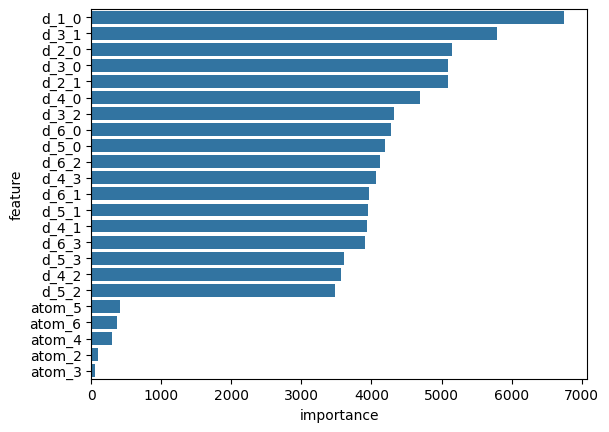

In [ ]:
#Importancia de cada característica den el modelo entrenado
cols = list(df.columns)
cols.remove('scalar_coupling_constant')
cols
df_importance = pd.DataFrame({'feature': cols, 'importance': model.feature_importances_})
sns.barplot(x="importance", y="feature", data=df_importance.sort_values('importance', ascending=False));

In [ ]:
def build_x_y_data(some_csv, coupling_type, n_atoms):
    full = build_couple_dataframe(some_csv, structures_csv, coupling_type, n_atoms=n_atoms)

    df = take_n_atoms(full, n_atoms)
    df = df.fillna(0)
    print(df.columns)

    if 'scalar_coupling_constant' in df:
        X_data = df.drop(['scalar_coupling_constant'], axis=1).values.astype('float32')
        y_data = df['scalar_coupling_constant'].values.astype('float32')
    else:
        X_data = df.values.astype('float32')
        y_data = None

    return X_data, y_data

In [ ]:
#Entrenar  un modelo de regresión para un tipo específico de acoplamiento químico y realizar predicciones en el conjunto de prueba
def train_and_predict_for_one_coupling_type(coupling_type, submission, n_atoms, n_folds=5, n_splits=5, random_state=128):
    print(f'*** Training Model for {coupling_type} ***')

    X_data, y_data = build_x_y_data(train_csv, coupling_type, n_atoms)
    X_test, _ = build_x_y_data(test_csv, coupling_type, n_atoms)
    y_pred = np.zeros(X_test.shape[0], dtype='float32')

    cv_score = 0

    if n_folds > n_splits:
        n_splits = n_folds

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    for fold, (train_index, val_index) in enumerate(kfold.split(X_data, y_data)):
        if fold >= n_folds:
            break
        X_train, X_val = X_data[train_index], X_data[val_index]
        y_train, y_val = y_data[train_index], y_data[val_index]

        model = LGBMRegressor(**LGB_PARAMS, n_estimators=1500, n_jobs = -1)
        model.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_val, y_val)], eval_metric='mae',
            verbose=100, early_stopping_rounds=200)

        y_val_pred = model.predict(X_val)
        val_score = np.log(mean_absolute_error(y_val, y_val_pred))
        print(f'{coupling_type} Fold {fold}, logMAE: {val_score}')

        cv_score += val_score / n_folds
        y_pred += model.predict(X_test) / n_folds


    submission.loc[test_csv['type'] == coupling_type, 'scalar_coupling_constant'] = y_pred
    return cv_score

In [ ]:
model_params = {
    '1JHN': 7,
    '1JHC': 10,
    '2JHH': 9,
    '2JHN': 9,
    '2JHC': 9,
    '3JHH': 9,
    '3JHC': 10,
    '3JHN': 10
}
N_FOLDS = 3
submission = submission_csv.copy()

cv_scores = {}
for coupling_type in model_params.keys():
    cv_score = train_and_predict_for_one_coupling_type(
        coupling_type, submission, n_atoms=model_params[coupling_type], n_folds=N_FOLDS)
    cv_scores[coupling_type] = cv_score

*** Training Model for 1JHN ***
Index(['atom_2', 'atom_3', 'atom_4', 'atom_5', 'atom_6', 'd_1_0', 'd_2_0',
       'd_2_1', 'd_3_0', 'd_3_1', 'd_3_2', 'd_4_0', 'd_4_1', 'd_4_2', 'd_4_3',
       'd_5_0', 'd_5_1', 'd_5_2', 'd_5_3', 'd_6_0', 'd_6_1', 'd_6_2', 'd_6_3',
       'scalar_coupling_constant'],
      dtype='object')
Index(['atom_2', 'atom_3', 'atom_4', 'atom_5', 'atom_6', 'd_1_0', 'd_2_0',
       'd_2_1', 'd_3_0', 'd_3_1', 'd_3_2', 'd_4_0', 'd_4_1', 'd_4_2', 'd_4_3',
       'd_5_0', 'd_5_1', 'd_5_2', 'd_5_3', 'd_6_0', 'd_6_1', 'd_6_2', 'd_6_3'],
      dtype='object')
Training until validation scores don't improve for 200 rounds
[100]	training's l1: 0.429923	valid_1's l1: 0.526374
[200]	training's l1: 0.348849	valid_1's l1: 0.474569
[300]	training's l1: 0.300754	valid_1's l1: 0.448967
[400]	training's l1: 0.267649	valid_1's l1: 0.43445
[500]	training's l1: 0.242747	valid_1's l1: 0.423128
[600]	training's l1: 0.220965	valid_1's l1: 0.413733
[700]	training's l1: 0.20272	valid_1's l1:

In [ ]:
#Puntajes de validación cruzada para diferentes tipos de acoplamiento químico
pd.DataFrame({'type': list(cv_scores.keys()), 'cv_score': list(cv_scores.values())})

,type,cv_score
0,1JHN,-0.956477
1,1JHC,-0.249053
2,2JHH,-1.712191
3,2JHN,-1.923585
4,2JHC,-1.176135
5,3JHH,-1.731734
6,3JHC,-1.077001
7,3JHN,-2.175541


In [ ]:

#Promedio de los puntajes de validación cruzada
np.mean(list(cv_scores.values()))

-1.3752145488073984

In [ ]:
submission[submission['scalar_coupling_constant'] == 0].shape

(0, 1)

In [ ]:
submission.head(10)

,scalar_coupling_constant
id,
4659076,15.740415
4659077,156.304993
4659078,9.172460
4659079,156.304993
4659080,15.740415
4659081,85.465759
4659082,-3.991209
4659083,-10.862069
4659084,-11.403858
